In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime

In [4]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [5]:
for stock in tech_list:
    # globals() turns string name into variable
    globals()[stock] = web.DataReader('F', 'yahoo', start, end)

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,9.386892,9.172908,9.285618,9.278127,4.309109e+07,8.859564
std,0.645740,0.673788,0.660175,0.664677,1.638812e+07,0.792704
min,7.850000,7.410000,7.530000,7.630000,1.352080e+07,7.145846
25%,8.825000,8.605000,8.740000,8.735000,3.267065e+07,8.260334
50%,9.480000,9.260000,9.370000,9.340000,4.018320e+07,8.737329
75%,9.875000,9.680000,9.775000,9.770000,5.009580e+07,9.560000
max,10.560000,10.340000,10.490000,10.510000,1.561367e+08,10.355441


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-10 to 2019-08-09
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


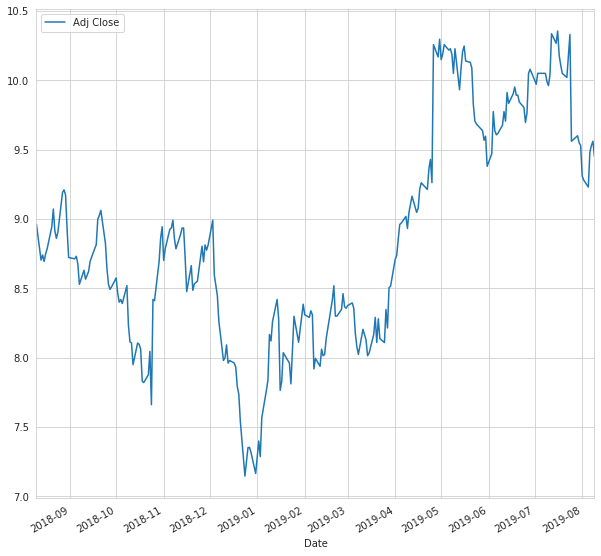

In [8]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,10))

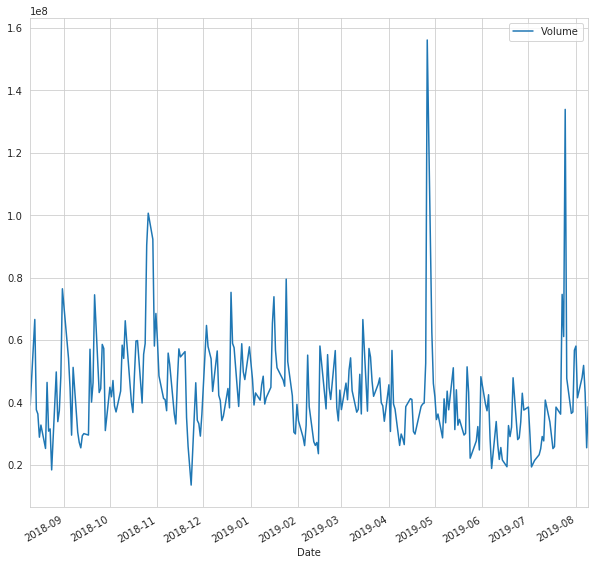

In [9]:
AAPL['Volume'].plot(legend=True, figsize=(10,10))

In [10]:
# Moving average analysis
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = "MA for %s Days" % (str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

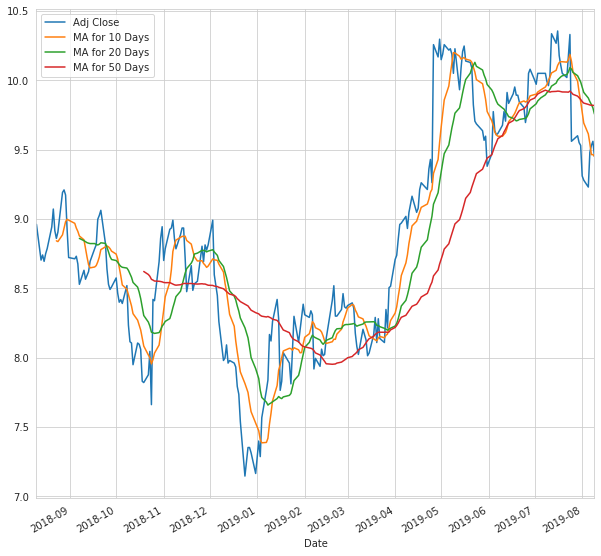

In [11]:
AAPL[['Adj Close', 'MA for 10 Days', 'MA for 20 Days', 'MA for 50 Days']].plot(subplots=False, figsize=(10,10))


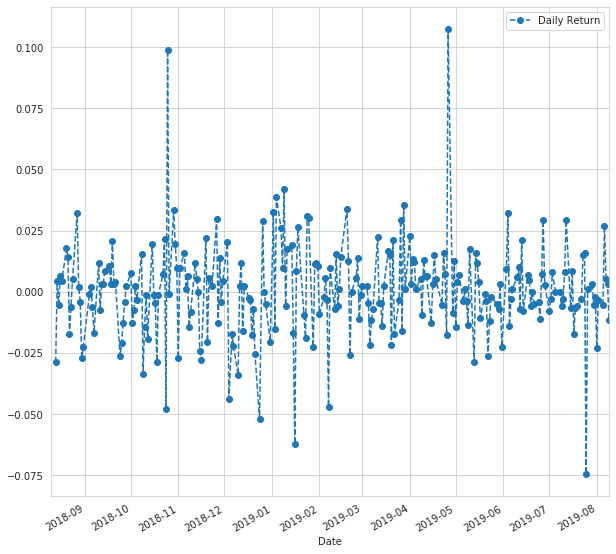

In [12]:
# Daily returns
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,10), legend=True, linestyle='--', marker='o')

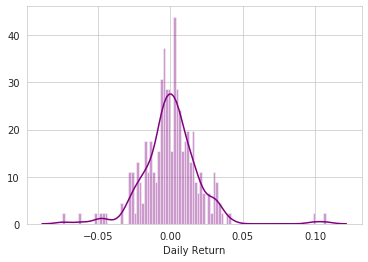

In [13]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color = 'purple')

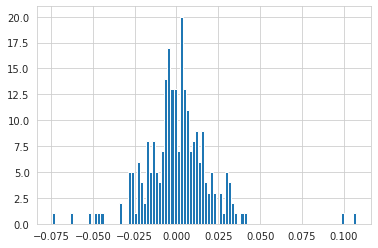

In [14]:
AAPL['Daily Return'].hist(bins=100)

In [15]:
# All stocks
closing_df = web.DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-10,204.358810,1886.300049,1237.609985,107.258286
2018-08-13,205.678345,1896.199951,1235.010010,106.480911
2018-08-14,206.544891,1919.650024,1242.099976,107.809334
2018-08-15,207.027420,1882.619995,1214.380005,106.347382
2018-08-16,210.060333,1886.520020,1206.489990,106.327629


In [16]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-10,NaN,NaN,NaN,NaN
2018-08-13,0.006457,0.005248,-0.002101,-0.007248
2018-08-14,0.004213,0.012367,0.005741,0.012476
2018-08-15,0.002336,-0.019290,-0.022317,-0.013561
2018-08-16,0.014650,0.002072,-0.006497,-0.000186


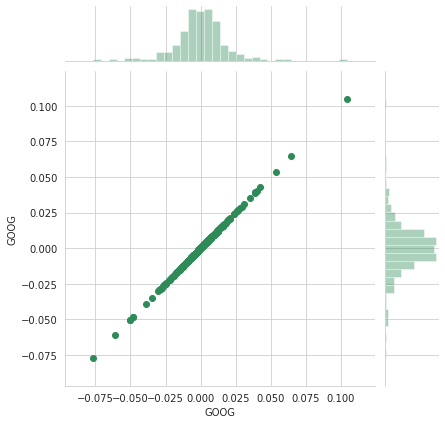

In [17]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

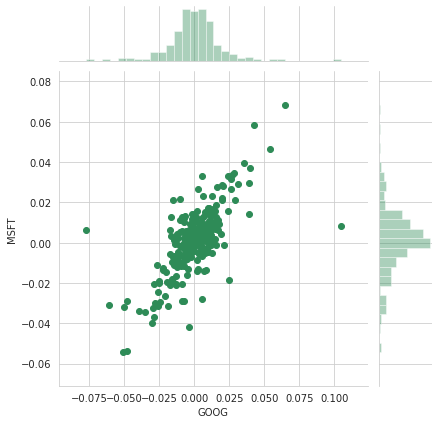

In [18]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

In [19]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-10,NaN,NaN,NaN,NaN
2018-08-13,0.006457,0.005248,-0.002101,-0.007248
2018-08-14,0.004213,0.012367,0.005741,0.012476
2018-08-15,0.002336,-0.019290,-0.022317,-0.013561
2018-08-16,0.014650,0.002072,-0.006497,-0.000186


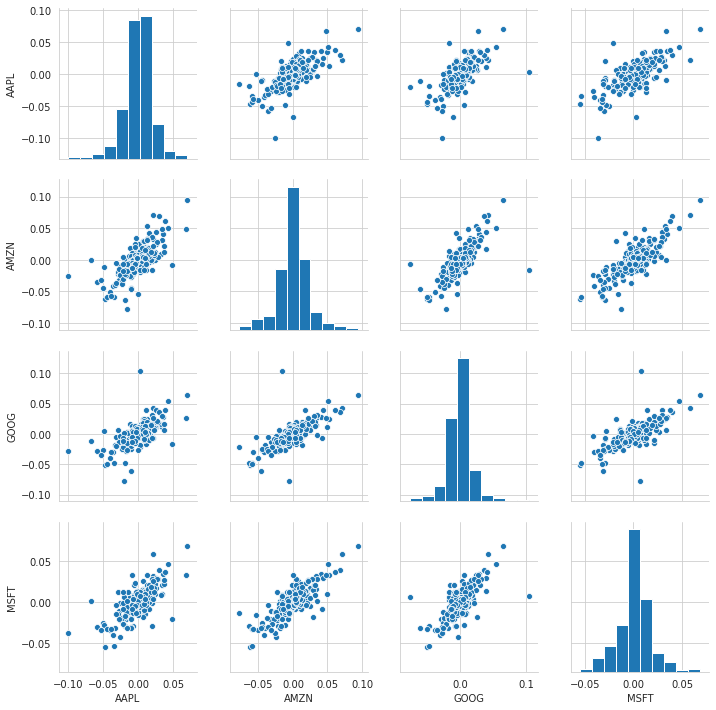

In [20]:
sns.pairplot(tech_rets.dropna())

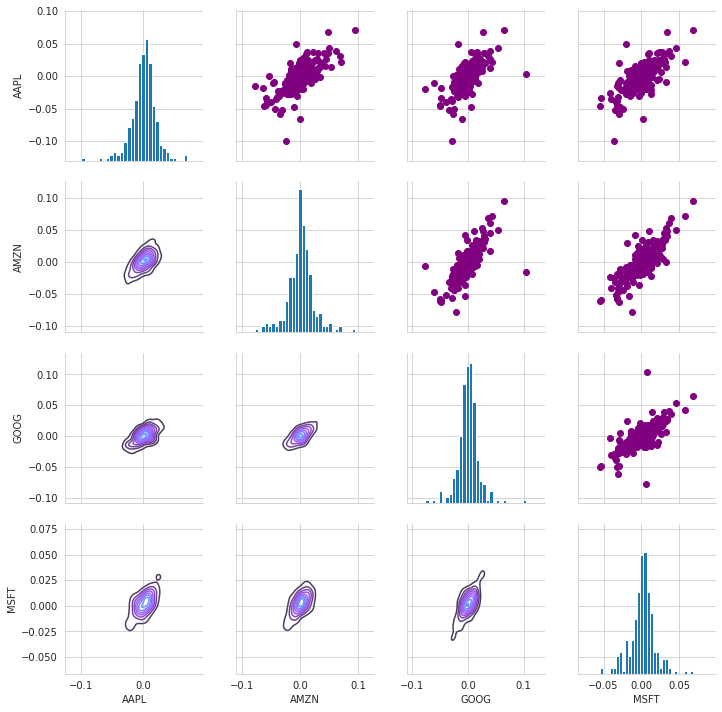

In [21]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

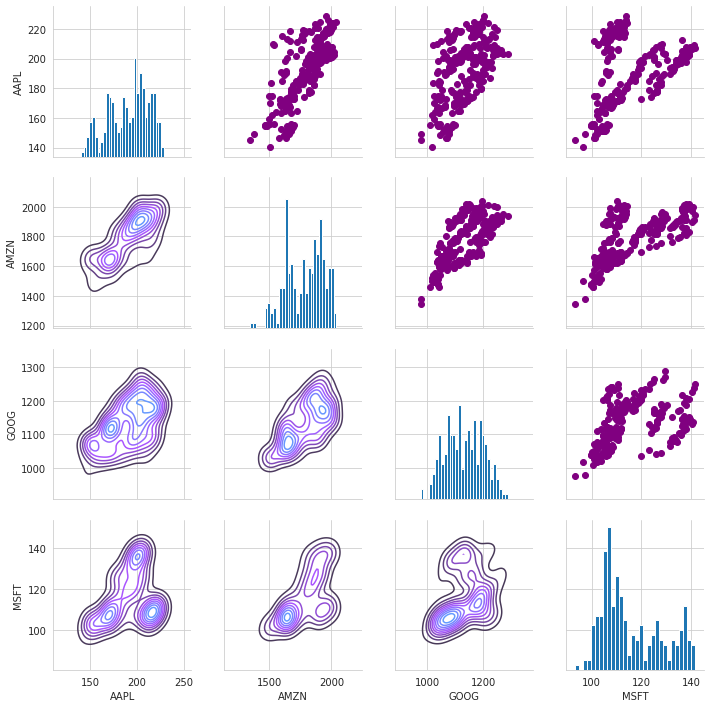

In [22]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

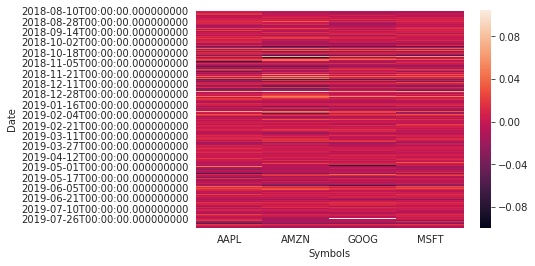

In [23]:
sns.heatmap(data=tech_rets)

In [24]:
rets = tech_rets.dropna()

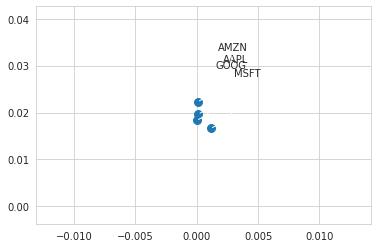

In [25]:
area = np.pi*20
plt.scatter(rets.mean() , rets.std(), s = area)
plt.xlabel = 'Expected Return'
plt.ylabel = 'Risk'
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
    )

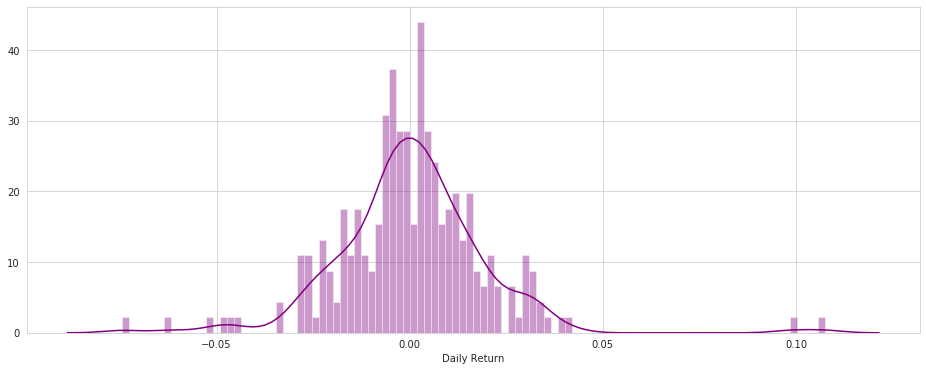

In [26]:
# Value at risk
plt.figure(figsize=(16, 6))
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [27]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-13,0.006457,0.005248,-0.002101,-0.007248
2018-08-14,0.004213,0.012367,0.005741,0.012476
2018-08-15,0.002336,-0.019290,-0.022317,-0.013561
2018-08-16,0.014650,0.002072,-0.006497,-0.000186
2018-08-17,0.019970,-0.002279,-0.004584,-0.000557


In [28]:
rets['AAPL'].quantile(0.05)

-0.031670163190108264

In [29]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [30]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
        return price

In [31]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-10,9.91,9.72,9.91,9.74,39180500.0,8.960981
2018-08-13,9.75,9.42,9.74,9.46,66586200.0,8.703377
2018-08-14,9.62,9.45,9.51,9.50,37657400.0,8.740177
2018-08-15,9.50,9.35,9.46,9.45,36298600.0,8.694176
2018-08-16,9.60,9.49,9.50,9.51,28857700.0,8.749377


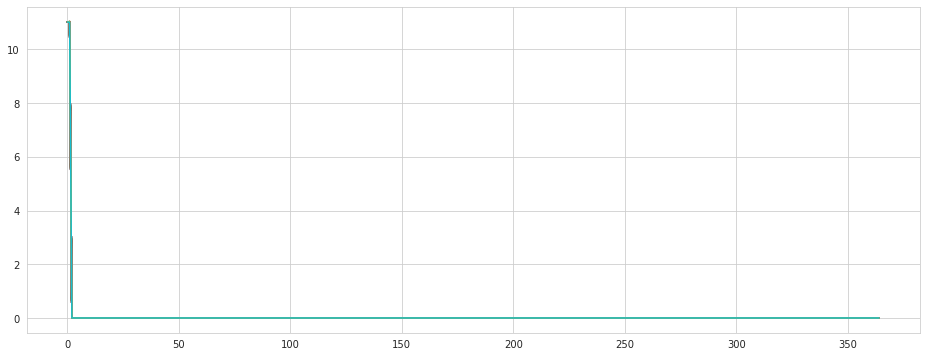

In [32]:
plt.figure(figsize=(16, 6))
start_price = 11.02
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

# plt.xlabel = 'Days'
# plt.ylabel = 'Price'
# plt.title = 'Monte Carlo Analysis for Google'
# plt.plot()

In [34]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)


ValueError: setting an array element with a sequence.